# Stanton Murillo Transport Validation

[1] "Ionic transport in high-energy-density matter"  [10.1103/PhysRevE.93.043203](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.043203)

[2]"Efficient model for electronic transport in high energy-density matter "  [https://doi.org/10.1063/5.0048162](https://doi.org/10.1063/5.0048162)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

import SMT.core.transport as smt
from SMT.core.physical_constants import *
from SMT.core.physical_parameters import rs_from_n

In [2]:
N_ions = 1
Z, A = 13, 26.98
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
# ρi_gpercc  = 1
ni_array_cc = np.array([6.02660153e+22])#np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={props.Zbar_array[0]:0.3e}, λeff = {props.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {props.g_matrix} ")
print(f"K_11(gij) = {props.K_11_matrix}")
print(f"K_12(gij) = {props.K_12_matrix}")
print(f"K_22(gij) = {props.K_22_matrix}")
print(f"K_13(gij) = {props.K_13_matrix}")
print(f"Dij = {props.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {props.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {props.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")


For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 4.814e-09 [cm]
[[gee, gei],[gie,gii]] = [[ 29.91065781  74.66113638]
 [ 74.66113638 186.36451663]] 
K_11(gij) = [[0.00265932 0.00071129]
 [0.00071129 0.00017471]]
K_12(gij) = [[0.00621226 0.00174804]
 [0.00174804 0.00044443]]
K_22(gij) = [[0.00700017 0.00184358]
 [0.00184358 0.00044536]]
K_13(gij) = [[0.02051537 0.0060109 ]
 [0.0060109  0.00156946]]
Dij = [[0.38185747 0.16202432]
 [0.16202432 0.00067513]] [cm^2/s]
σ = 1.365e+04 [S/cm]
κ = 1.414e+07 [erg/cm/s/K]


FROM LUKE:

For Z=13, A=26.98, T=1.000e+00 [eV], n = 6.027e+22 [1/cc]: 
Zbar=2.496e+00, λeff = 3.353e-02 [cm]
gii = [185.81354848] 
K_11(gii) = [0.00017552]
K_12(gii) = [0.00044746]
K_22(gii) = [0.00044746]
K_13(gii) = [0.00157653]
Dij = 2.349e-03 [cm^2/s]
κ = 4.792e+04 [erg/cm/s/K]

In [3]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 1
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )


print(f"For Z={Z}, A={A}, T={T_array_AU[0]*AU_to_eV:0.3e} [eV], n = {ni_array_cc[0]:0.3e} [1/cc]: ")
print(f"Zbar={props.Zbar_array[0]:0.3e}, λeff = {props.λeff*AU_to_cm:0.3e} [cm]")

print(f"[[gee, gei],[gie,gii]] = {props.g_matrix} ")
print(f"K_11(gij) = {props.K_11_matrix}")
print(f"K_12(gij) = {props.K_12_matrix}")
print(f"K_22(gij) = {props.K_22_matrix}")
print(f"K_13(gij) = {props.K_13_matrix}")
print(f"Dij = {props.Dij*AU_to_cm**2/AU_to_s} [cm^2/s]")
print(f"σ = {props.σ * AU_to_Siemens/AU_to_cm:0.3e} [S/cm]")
print(f"κ = {props.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K):0.3e} [erg/cm/s/K]")

For Z=1, A=1, T=1.000e+00 [eV], n = 6.022e+23 [1/cc]: 
Zbar=6.913e-01, λeff = 3.693e-09 [cm]
[[gee, gei],[gie,gii]] = [[38.99186056 26.9549775 ]
 [26.9549775  18.63390978]] 
K_11(gij) = [[0.00183299 0.00306983]
 [0.00306983 0.00504752]]
K_12(gij) = [[0.0043551  0.00711932]
 [0.00711932 0.01137128]]
K_22(gij) = [[0.00480562 0.00809224]
 [0.00809224 0.0133607 ]]
K_13(gij) = [[0.01457291 0.02338449]
 [0.02338449 0.03663815]]
Dij = [[0.11460446 0.1012796 ]
 [0.1012796  0.0042682 ]] [cm^2/s]
σ = 1.143e+04 [S/cm]
κ = 1.588e+07 [erg/cm/s/K]


In [4]:
T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κ_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    props.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = props.σ * AU_to_Siemens/AU_to_cm
    κ_list_cgs[i] = props.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = props.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*props.K_11_matrix[0,1:] - 20*props.K_12_matrix[0,1:] + 4*props.K_13_matrix[0,1:]," = ", 25*props.K_11_matrix[0,1:], - 20*props.K_12_matrix[0,1:], 4*props.K_13_matrix[0,1:])
    print(f"g: {props.g_matrix}")
    print("denom: ", 25*props.K_11_matrix - 20*props.K_12_matrix + 4*props.K_13_matrix, '\n')#," = \n", 25*props.K_11_matrix, - 20*props.K_12_matrix, 4*props.K_13_matrix)


g: [[391.75362263 270.40617454]
 [270.40617454 186.64664475]]
denom:  [[0.000547   0.00098482]
 [0.00098482 0.00175283]] 

g: [[348.72542059 240.70857418]
 [240.70857418 166.14968185]]
denom:  [[0.00065862 0.00118169]
 [0.00118169 0.00209493]] 

g: [[310.42098707 214.27137067]
 [214.27137067 147.90308066]]
denom:  [[0.0007922  0.00141625]
 [0.00141625 0.00250046]] 

g: [[276.32171362 190.73662631]
 [190.73662631 131.65979662]]
denom:  [[0.00095188 0.0016953 ]
 [0.0016953  0.00298033]] 

g: [[245.9659259  169.78569968]
 [169.78569968 117.19990772]]
denom:  [[0.00114246 0.00202677]
 [0.00202677 0.00354719]] 

g: [[218.94263296 151.13493134]
 [151.13493134 104.32763671]]
denom:  [[0.00136963 0.00241983]
 [0.00241983 0.00421556]] 

g: [[194.88596279 134.53180319]
 [134.53180319  92.86870029]]
denom:  [[0.00163999 0.00288515]
 [0.00288515 0.00500214]] 

g: [[173.4702087  119.75151934]
 [119.75151934  82.66794911]]
denom:  [[0.00196127 0.00343506]
 [0.00343506 0.00592607]] 

g: [[154.4054194

## $K_{nm}$

In [5]:
K11_data = read_csv("K_11(g).txt", delim_whitespace=True, header=1)

(array(0.21901579), array(0.12091229))

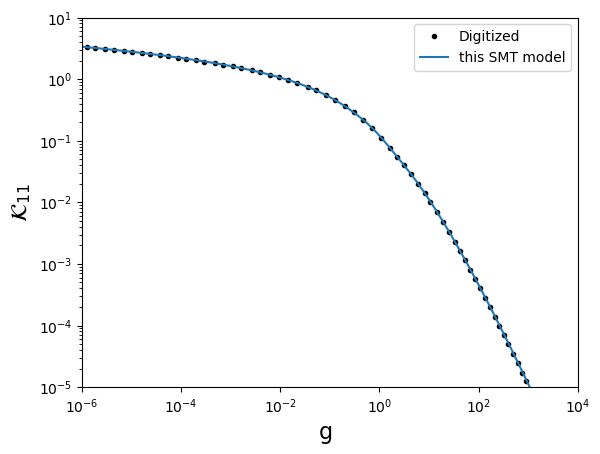

In [6]:
from SMT.core.transport import K_nm

fig, ax = plt.subplots( facecolor='white')

#Plot iSMT digitized
ax.plot(K11_data['g'], K11_data['K_11(g)'],'k.', label="Digitized")
#
g_array = np.geomspace(1e-6,1e4,num=100)
ax.plot(g_array,[K_nm(g,1,1) for g in g_array], label='this SMT model')

ax.set_xlabel(r"g ", fontsize=16)
ax.set_ylabel(r"$\mathcal{K}_{11}$", fontsize=16)

# Inset Text Box
# bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-5,1e1)
ax.set_xlim(1e-6,1e4)
# Legend
ax.legend()

K_nm(1,1,2), K_nm(1,1,1) 


## Electrical Conductivity

First, loading data from [2]

In [7]:
σ_data_e1b = read_csv("Fig1b_eSMT_σ.txt", delim_whitespace=True, header=1)

In [8]:
T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κ_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    props.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = props.σ * AU_to_Siemens/AU_to_cm
    κ_list_cgs[i] = props.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = props.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*props.K_11_matrix[0,1:] - 20*props.K_12_matrix[0,1:] + 4*props.K_13_matrix[0,1:]," = ", 25*props.K_11_matrix[0,1:], - 20*props.K_12_matrix[0,1:], 4*props.K_13_matrix[0,1:])
    # print(f"g: {props.g_matrix}")
    # print("denom: ", 25*props.K_11_matrix - 20*props.K_12_matrix + 4*props.K_13_matrix, '\n')#," = \n", 25*props.K_11_matrix, - 20*props.K_12_matrix, 4*props.K_13_matrix)


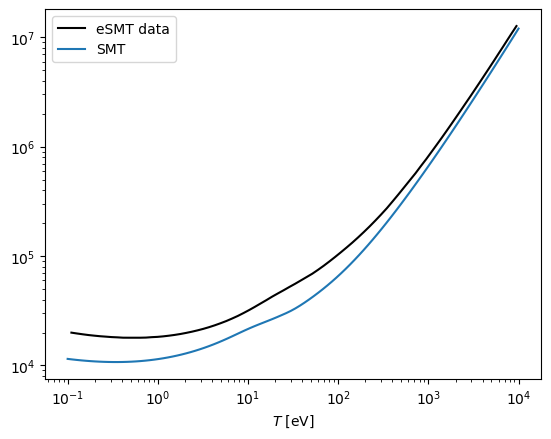

In [9]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(σ_data_e1b['T[eV]'], σ_data_e1b['σ[S/cm]'],'k-', label="eSMT data")

#
ax.plot(T_AU_list*AU_to_eV, σ_list_cgs, label='SMT')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()



## Thermal Conductivity

#### SMT

In [10]:
κ_data_e3b = read_csv("Fig3b_eSMT_κ.txt", delim_whitespace=True, header=1)

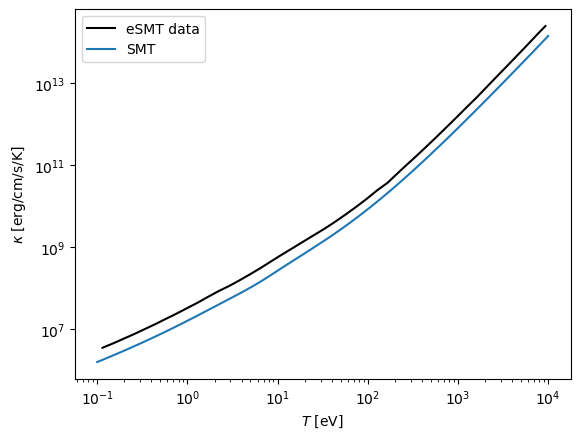

In [11]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κ_data_e3b['T[eV]'], κ_data_e3b['κ[erg/cm/s/K]'],'k-', label="eSMT data")

#
ax.plot(T_AU_list*AU_to_eV, κ_list_cgs, label='SMT')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()


In [12]:
25*props.K_11_matrix[1:,1], - 20*props.K_12_matrix[1:,1], 4*props.K_13_matrix[1:,1]

(array([50.48193448]), array([-45.55703759]), array([19.30345827]))

#### TCCW2

In [13]:
N_ions = 1
Z, A = 6, 12
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 10
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
tccw2_κ_props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )

T_AU_list = np.geomspace(1e-2,2e3,num=50)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κe_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
g_ee_list = np.ones_like(T_AU_list)
λi_list = np.ones_like(T_AU_list)
λe_list = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    tccw2_κ_props.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = tccw2_κ_props.σ * AU_to_Siemens/AU_to_cm
    κe_list_cgs[i] = tccw2_κ_props.κee * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = tccw2_κ_props.Dij[1,1] *AU_to_cm**2/AU_to_s
    g_ee_list[i] = tccw2_κ_props.g_matrix[0,0]
    λi_list[i]   = tccw2_κ_props.λi_array[0]
    λe_list[i]   = tccw2_κ_props.λe

In [14]:
κe_data_tccw2_κ = read_csv("Fig7tm_TCCW2_κ.txt", delim_whitespace=True, header=1)
κe_data_tccw2_κ_AA = read_csv("Fig7tm_TCCW2_κ_AA.txt", delim_whitespace=True, header=1)

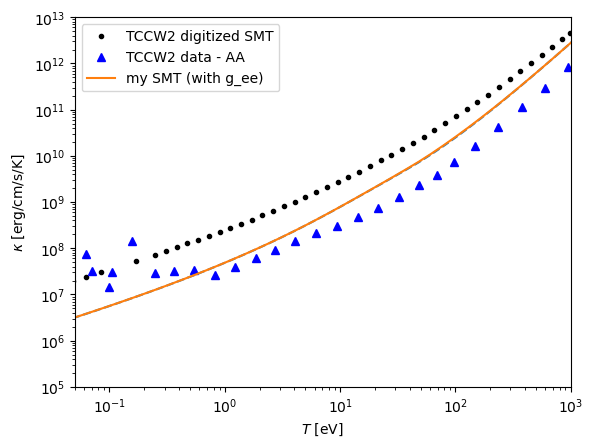

In [15]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κe_data_tccw2_κ['T[eV]'], κe_data_tccw2_κ['κ[erg/cm/s/K]'],'k.', label="TCCW2 digitized SMT")
ax.plot(κe_data_tccw2_κ_AA['T[eV]'], κe_data_tccw2_κ_AA['κ[erg/cm/s/K]'],'b^', label="TCCW2 data - AA")
TTM_data = np.array([8.96966223e+00, 1.08338833e+01, 1.31120882e+01, 1.59035397e+01,
       1.93334588e+01, 2.35604924e+01, 2.87865587e+01, 3.52699084e+01,
       4.33425723e+01, 5.34338319e+01, 6.61020312e+01, 8.20780371e+01,
       1.02325106e+02, 1.28122070e+02, 1.61179970e+02, 2.03807118e+02,
       2.59144924e+02, 3.31508077e+02, 4.26879934e+02, 5.53640472e+02,
       7.23644730e+02, 9.53830854e+02, 1.26862655e+03, 1.70354692e+03,
       2.31052979e+03, 3.16569980e+03, 4.38029592e+03, 6.11531449e+03,
       8.60011680e+03, 1.21559167e+04, 1.72296337e+04, 2.44555602e+04,
       3.47801872e+04, 4.97003348e+04, 7.16210763e+04, 1.06402845e+05,
       1.61905917e+05, 2.51419239e+05, 3.98272534e+05, 6.42195140e+05,
       1.05088331e+06, 1.74086564e+06, 2.91424414e+06, 4.92305188e+06,
       8.38232699e+06, 1.43693219e+07, 2.47751057e+07, 4.29261600e+07,
       7.46851843e+07, 1.30404080e+08])
ax.plot(T_AU_list*AU_to_eV, TTM_data*J_to_AU*AU_to_erg/(m_to_AU*AU_to_cm),'--')
#
ax.plot(T_AU_list*AU_to_eV, κe_list_cgs, label='my SMT (with g_ee)')

ax.set_ylabel(r"$\kappa$ [erg/cm/s/K]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e5,1e13)
ax.set_xlim(0.5e-1,1e3)

# Legend
ax.legend()


In [16]:
25*props.K_11_matrix[1:,1], - 20*props.K_12_matrix[1:,1], 4*props.K_13_matrix[1:,1]

(array([50.48193448]), array([-45.55703759]), array([19.30345827]))

## Diffusion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


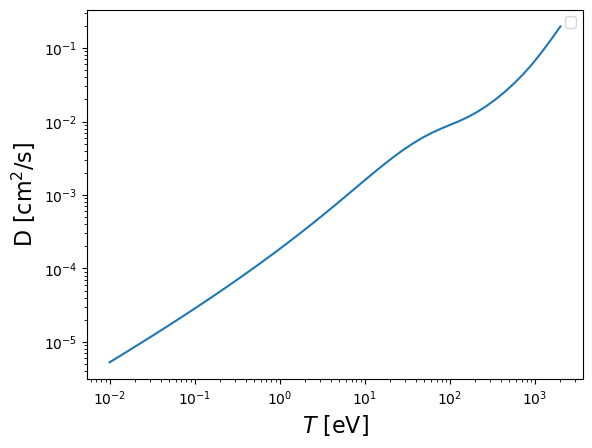

In [17]:
fig, ax = plt.subplots( facecolor='white')

ax.plot(T_AU_list*AU_to_eV, D_list_cgs, label='')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r"D [cm$^2$/s]", fontsize=16)
ax.set_xlabel(r"$T$ [eV]", fontsize=16)

# Legend
ax.legend()


## Temperature Relaxation
In reference [1], they actually use
$$\tau_{MD} = 2/(\tau_{ei}^{-1} + \tau_{ie}^{-1}) $$
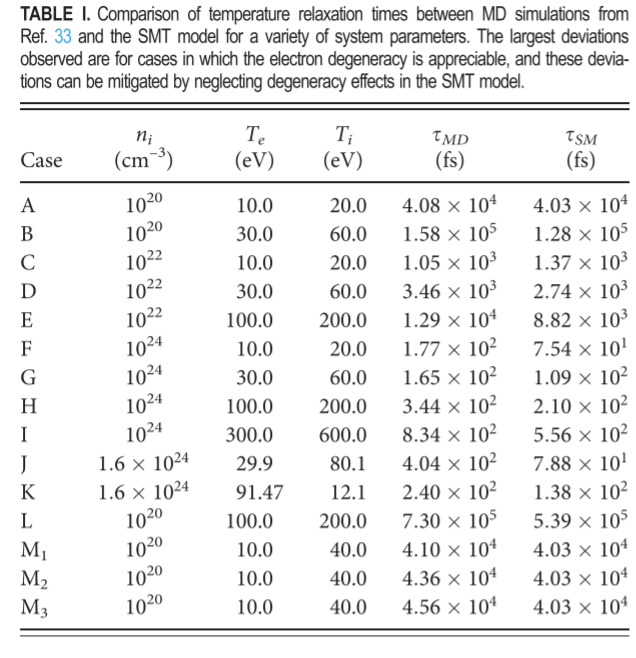


In [18]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])


In [19]:
# Case A
T_array_AU = np.array([10*eV_to_AU, 20*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( props.τij[0,1]**-1 + props.τij[1,0]**-1)  *AU_to_s*1e15))

τ_SM = 4.55e+04


In [20]:
# Case B
T_array_AU = np.array([30*eV_to_AU, 60*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( props.τij[0,1]**-1 + props.τij[1,0]**-1)  *AU_to_s*1e15))

τ_SM = 1.35e+05


In [21]:
# 